<a href="https://colab.research.google.com/github/gmprovan/CS4705/blob/main/Assignment_2_Learning_Bayesian_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this notebook is to gain some practice in learning graphical models. Your goal is to:

1.   load the Breast Cancer (categorical) data set: https://archive.ics.uci.edu/ml/datasets/breast+cancer
2.   keep the last 20% of the data for testing
3.   compare the performance of 3 learned models on the test data: naive Bayes, tree-structured BN (using the Chow-Liu algorithm), and BN

Below I provide some code fragments to assist with this task.

**Marks:**
*   70%: successful learning of 3 models
*   30%: critical discussion of the reasons for any differences in predictive accuracy



In [1]:
!pip install pgmpy
!pip install pandas
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from pgmpy.estimators import K2Score, BicScore
from pgmpy.models import BayesianModel, BayesianNetwork

c:\Users\anido\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
"""
7. Attribute Information:
   1. Class: no-recurrence-events, recurrence-events
   2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: lt40, ge40, premeno.
   4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44,
                  45-49, 50-54, 55-59.
   5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26,
                 27-29, 30-32, 33-35, 36-39.
   6. node-caps: yes, no.
   7. deg-malig: 1, 2, 3.
   8. breast: left, right.
   9. breast-quad: left-up, left-low, right-up,	right-low, central.
  10. irradiat:	yes, no.
"""

# Load data
data = pd.read_csv('./data/breast-cancer.data', names=['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'])

In [4]:
# initial visualization
data.tail()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
285,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


In [5]:
# Change ? to NaN
data[data == "?"] = np.nan

In [6]:
data.age.unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

<Axes: xlabel='age'>

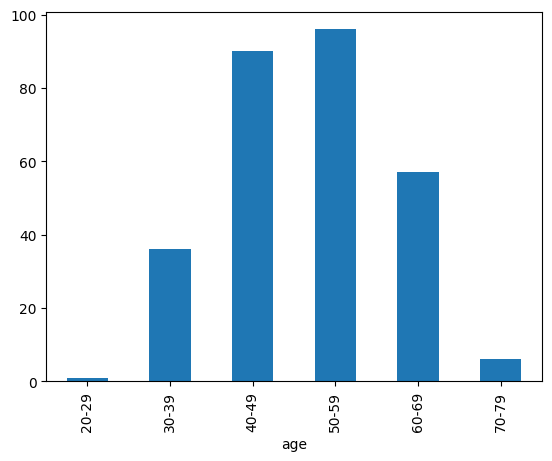

In [7]:
data.age.value_counts().reindex(["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]).plot(kind="bar")

In [8]:
data.menopause.unique()

array(['premeno', 'ge40', 'lt40'], dtype=object)

<Axes: xlabel='menopause'>

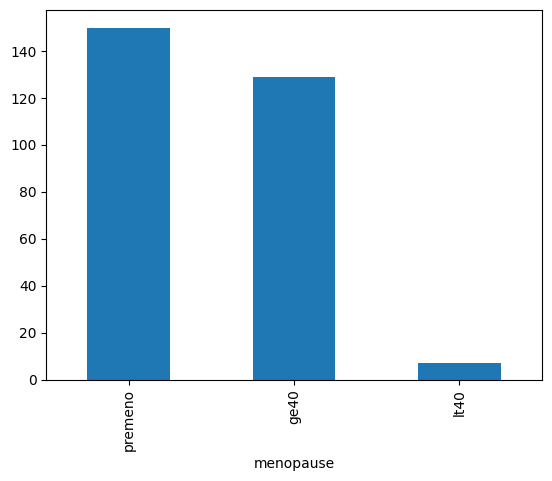

In [9]:
data.menopause.value_counts().plot(kind="bar")

In [10]:
data["tumor-size"].unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

<Axes: xlabel='tumor-size'>

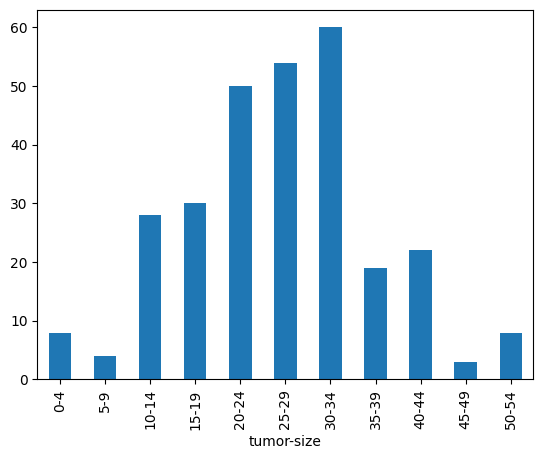

In [11]:
data["tumor-size"].value_counts().reindex(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']).plot(kind="bar")

In [12]:
data["inv-nodes"].unique()

array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
      dtype=object)

<Axes: xlabel='inv-nodes'>

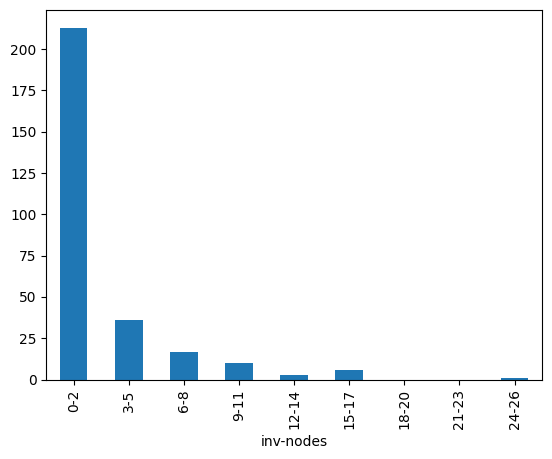

In [13]:
data["inv-nodes"].value_counts().reindex(['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23', '24-26']).plot(kind="bar")

In [14]:
data["node-caps"].unique()

array(['no', 'yes', nan], dtype=object)

<Axes: xlabel='node-caps'>

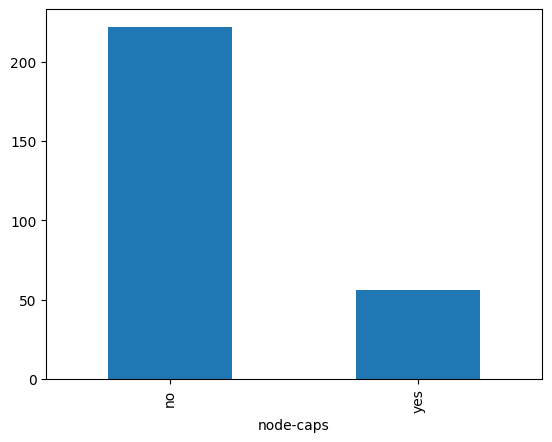

In [15]:
data["node-caps"].value_counts().plot(kind="bar")

In [16]:
data["deg-malig"].unique()

array([3, 2, 1], dtype=int64)

<Axes: xlabel='deg-malig'>

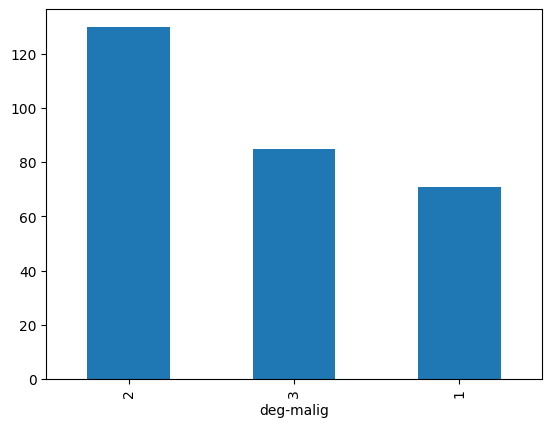

In [17]:
data["deg-malig"].value_counts().plot(kind="bar")

In [18]:
data["breast"].unique()

array(['left', 'right'], dtype=object)

<Axes: xlabel='breast'>

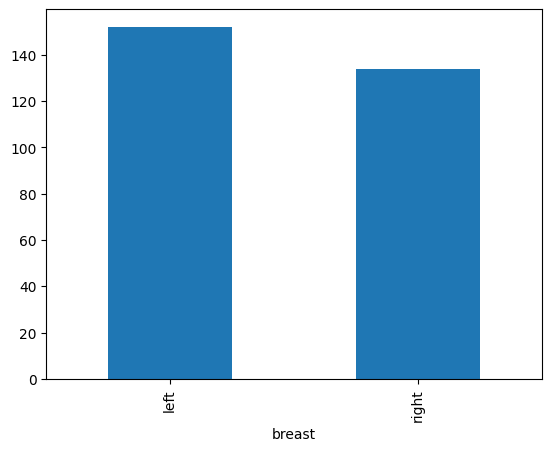

In [19]:
data["breast"].value_counts().plot(kind="bar")

In [20]:
data["breast-quad"].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', nan],
      dtype=object)

<Axes: xlabel='breast-quad'>

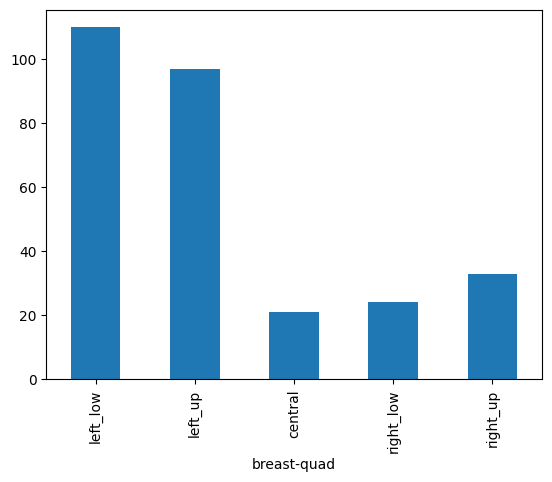

In [21]:
data["breast-quad"].value_counts().reindex(["left_low", "left_up", "central", "right_low", "right_up"]).plot(kind="bar")

In [22]:
data["irradiat"].unique()

array(['no', 'yes'], dtype=object)

<Axes: xlabel='irradiat'>

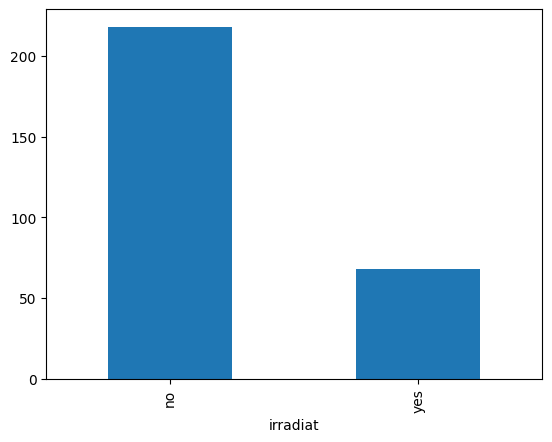

In [23]:
data["irradiat"].value_counts().plot(kind="bar")

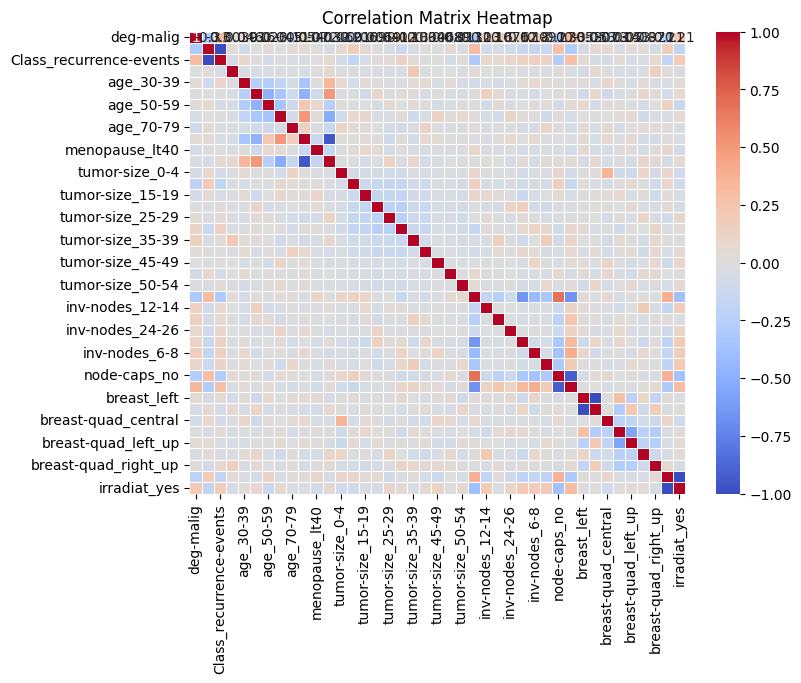

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(pd.get_dummies(data).corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
# import test train split
from sklearn.model_selection import train_test_split

In [126]:
# separate train and test data
dtrain, dtest = train_test_split(data, test_size=0.2, random_state=0)

First learn a naive Bayes model

In [63]:
from pgmpy.models.NaiveBayes import NaiveBayes
from pgmpy.estimators import MaximumLikelihoodEstimator
# create the structure manually to create model_struct

model_nb = NaiveBayes(data.columns[1:], data.columns[0])

model_nb.fit(dtrain, estimator=MaximumLikelihoodEstimator)

mle_train_nb = MaximumLikelihoodEstimator(model=model_nb, data= dtrain)
mle_test_nb = MaximumLikelihoodEstimator(model=model_nb, data= dtest)

In [64]:
print(mle_train_nb.estimate_cpd('Class'))
print(mle_test_nb.estimate_cpd('Class'))

+-----------------------------+---------+
| Class(no-recurrence-events) | 0.70614 |
+-----------------------------+---------+
| Class(recurrence-events)    | 0.29386 |
+-----------------------------+---------+
+-----------------------------+----------+
| Class(no-recurrence-events) | 0.689655 |
+-----------------------------+----------+
| Class(recurrence-events)    | 0.310345 |
+-----------------------------+----------+


In [127]:
# test the accuracy of the model
from pgmpy.estimators import K2Score, BicScore

# create the model
model = NaiveBayes(data.columns[1:], data.columns[0])
model.fit(dtrain, estimator=MaximumLikelihoodEstimator)

# print the score
print(K2Score(dtest).score(model))
print(BicScore(dtest).score(model))

print(K2Score(dtrain).score(model))
print(BicScore(dtrain).score(model))

-631.4459835744298
-673.7537551121186
-2331.709355466619
-2382.1177612636257


Next, learn a tree-structured model

In [158]:
from pgmpy.estimators import TreeSearch

# Impute missing data with the mode
data = data.fillna(data.mode().iloc[0])

# learn graph structure
est = TreeSearch(dtest, root_node="Class")
dag = est.estimate(estimator_type="chow-liu")

from pgmpy.estimators import BayesianEstimator

# there are many choices of parametrization, here is one example
model = BayesianNetwork(dag.edges())
model.fit(
    data, estimator=BayesianEstimator, prior_type="dirichlet", pseudo_counts=0.1
)


Building tree: 100%|██████████| 45/45.0 [00:00<00:00, 1353.65it/s]

In [159]:
print(K2Score(dtest).score(model))
print(BicScore(dtest).score(model))

print((model.predict(dtest[data.columns[1:]]).values == dtest[[data.columns[0]]].reset_index(drop=True).values).sum() / len(dtrain))

-624.2146740090847
-839.2568355799286


100%|██████████| 56/56 [00:00<00:00, 1626.98it/s]

0.16666666666666666


In [133]:
print(K2Score(dtrain).score(model))
print(BicScore(dtrain).score(model))

print((model.predict(dtrain[data.columns[1:]]).values == dtrain[[data.columns[0]]].reset_index(drop=True).values).sum() / len(dtrain))

-2292.027249591394
-2579.4773512652855


100%|██████████| 220/220 [00:00<00:00, 1040.19it/s]


0.7149122807017544


In [155]:
preds = {}
for col in data:
    preds[col] = [((model.predict(dtest.drop(columns=[col])).values == dtest[[col]].reset_index(drop=True).values).sum() / len(dtrain)),
                  ((model.predict(dtrain.drop(columns=[col])).values == dtrain[[col]].reset_index(drop=True).values).sum() / len(dtrain))]

100%|██████████| 221/221 [00:00<00:00, 1003.42it/s]


In [157]:

print("test", "|", "train")
for col in preds:
    print(col, preds[col])

test | train
Class [0.16666666666666666, 0.7149122807017544]
age [0.11842105263157894, 0.543859649122807]
menopause [0.20175438596491227, 0.8377192982456141]
tumor-size [0.07894736842105263, 0.3157894736842105]
inv-nodes [0.21052631578947367, 0.8026315789473685]
node-caps [0.2324561403508772, 0.868421052631579]
deg-malig [0.13157894736842105, 0.4868421052631579]
breast [0.14912280701754385, 0.6929824561403509]
breast-quad [0.11403508771929824, 0.5263157894736842]
irradiat [0.19736842105263158, 0.7587719298245614]


In [33]:
from pgmpy.factors.discrete import TabularCPD

cpds = model.get_cpds()
for cpd in cpds:
    print(model.active_trail_nodes("Class", cpd.variable))
    print(f"CPD for variable '{cpd.variable}':")
    print(cpd.state_names)
    print(cpd.values)

NameError: name 'model' is not defined

In [134]:
model.edges()

OutEdgeView([('Class', 'tumor-size'), ('tumor-size', 'age'), ('tumor-size', 'breast-quad'), ('tumor-size', 'inv-nodes'), ('tumor-size', 'deg-malig'), ('age', 'menopause'), ('breast-quad', 'breast'), ('inv-nodes', 'node-caps'), ('deg-malig', 'irradiat')])

In [ ]:
for val in dtest.values:
    for i, val in enumerate(val):
        print(val)
        cpd = model.get_cpds(data.columns[i])
        print("val: ", cpd.values)
        print("Name: ", cpd.state_names[data.columns[i]])
        #print("Name: ", cpd.values[cpd.state_names[data.columns[i]].index(val)])

no-recurrence-events
val:  [0.7239819 0.2760181]
Name:  ['no-recurrence-events', 'recurrence-events']
40-49
val:  [[0.28571429 0.04545455 0.16666667 0.10810811 0.1025641  0.125
  0.07692308 0.2        0.         0.33333333 0.        ]
 [0.28571429 0.36363636 0.16666667 0.45945946 0.30769231 0.375
  0.46153846 0.25       0.         0.33333333 0.16666667]
 [0.28571429 0.27272727 0.33333333 0.2972973  0.43589744 0.29166667
  0.38461538 0.35       0.         0.33333333 0.5       ]
 [0.         0.27272727 0.33333333 0.10810811 0.15384615 0.20833333
  0.07692308 0.1        1.         0.         0.33333333]
 [0.14285714 0.04545455 0.         0.02702703 0.         0.
  0.         0.1        0.         0.         0.        ]]
Name:  ['30-39', '40-49', '50-59', '60-69', '70-79']
premeno
val:  [[0.         0.12162162 0.63513514 0.95121951 1.        ]
 [0.03703704 0.         0.02702703 0.04878049 0.        ]
 [0.96296296 0.87837838 0.33783784 0.         0.        ]]
Name:  ['ge40', 'lt40', 'premen

Finally learn a Bayesian network. **First learn the structure, and then the parameters.**

# **Learning Bayesian Networks**

We now want to learn a Bayesian network, given a set of sample data. Learning a Bayesian network can be split into two problems:

 **Structure learning**: Given a set of data samples, estimate a DAG that captures the dependencies between the variables.

  **Parameter learning**: Given a set of data samples and a DAG that captures the dependencies between the variables, estimate the (conditional) probability distributions of the individual variables.


Methods for doing this include:

Structure learning for discrete, fully observed networks:
    
*    Score-based structure estimation (BIC/BDeu/K2 score; exhaustive search, hill climb/tabu search)
*   Constraint-based structure estimation (PC)

Parameter learning for discrete nodes:

*   Maximum Likelihood Estimation
*   Bayesian Estimation
    





**Structure Learning**

You can use MLE or Bayesian estimation methods.

MLE State counts

To make sense of the given data, we can start by counting how often each state of the variable occurs. If the variable is dependent on parents, the counts are done conditionally on the parents states, i.e. for separately for each parent configuration:

**Bayesian Parameter Estimation**


The Bayesian Parameter Estimator starts with already existing prior CPDs, that express our beliefs about the variables before the data was observed. Those "priors" are then updated, using the state counts from the observed data. 

One can think of the priors as consisting in pseudo state counts, that are added to the actual counts before normalization. Unless one wants to encode specific beliefs about the distributions of the variables, one commonly chooses uniform priors, i.e. ones that deem all states equiprobable.

A very simple prior is the so-called K2 prior, which simply adds 1 to the count of every single state. A somewhat more sensible choice of prior is BDeu (Bayesian Dirichlet equivalent uniform prior). For BDeu we need to specify an equivalent sample size N and then the pseudo-counts are the equivalent of having observed N uniform samples of each variable (and each parent configuration). 

**Maximum Likelihood Estimation**


A natural estimate for the CPDs is to simply use the relative frequencies, with which the variable states have occured. 

This approach is Maximum Likelihood Estimation (MLE). According to MLE, we should fill the CPDs in such a way, that $P(\text{data}|\text{model})$ is maximal. This is achieved when using the relative frequencies.  pgmpy supports MLE as follows:

In [160]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(model, data)


In [172]:
mle.model.cpds[0].values

array([0.70265549, 0.29734451])


mle.estimate_cpd(variable) computes the state counts and divides each cell by the (conditional) sample size. The mle.get_parameters()-method returns a list of CPDs for all variable of the model.

The built-in fit()-method of BayesianModel provides more convenient access to parameter estimators:

In [173]:
# Calibrate all CPDs of `model` using MLE:
model.fit(data, estimator=MaximumLikelihoodEstimator)

In [182]:
for col in range(data.columns.size):
    print(data.columns[col])
    print(model.cpds[col])

Class
+-----------------------------+----------+
| Class(no-recurrence-events) | 0.702797 |
+-----------------------------+----------+
| Class(recurrence-events)    | 0.297203 |
+-----------------------------+----------+
age
+-------------------+-----------------------------+--------------------------+
| Class             | Class(no-recurrence-events) | Class(recurrence-events) |
+-------------------+-----------------------------+--------------------------+
| tumor-size(0-4)   | 0.03482587064676617         | 0.011764705882352941     |
+-------------------+-----------------------------+--------------------------+
| tumor-size(10-14) | 0.13432835820895522         | 0.011764705882352941     |
+-------------------+-----------------------------+--------------------------+
| tumor-size(15-19) | 0.11442786069651742         | 0.08235294117647059      |
+-------------------+-----------------------------+--------------------------+
| tumor-size(20-24) | 0.1691542288557214          | 0.1882352941

In [184]:
preds = {}
for col in data:
    preds[col] = [((model.predict(dtest.drop(columns=[col])).values == dtest[[col]].reset_index(drop=True).values).sum() / len(dtrain)),
                  ((model.predict(dtrain.drop(columns=[col])).values == dtrain[[col]].reset_index(drop=True).values).sum() / len(dtrain))]
print("test", "|", "train")
for col in preds:
    print(col, preds[col])

100%|██████████| 221/221 [00:00<00:00, 969.96it/s]


test | train
Class [0.16666666666666666, 0.7149122807017544]
age [0.11842105263157894, 0.543859649122807]
menopause [0.20175438596491227, 0.8377192982456141]
tumor-size [0.07894736842105263, 0.3157894736842105]
inv-nodes [0.21052631578947367, 0.8026315789473685]
node-caps [0.2324561403508772, 0.868421052631579]
deg-malig [0.13157894736842105, 0.4868421052631579]
breast [0.14912280701754385, 0.6929824561403509]
breast-quad [0.11403508771929824, 0.5263157894736842]
irradiat [0.19736842105263158, 0.7587719298245614]


# **Structure Learning**




To learn model structure (a DAG) from a data set, there are two broad techniques:

*   score-based structure learning
*   constraint-based structure learning

In this assignment focus on the score-based approach.


# **Score-based Structure Learning**


This approach construes model selection as an optimization task. It has two building blocks:

A scoring function $s_D\colon M \to \mathbb R$ that maps models to a numerical score, based on how well they fit to a given data set $D$.
A search strategy to traverse the search space of possible models $M$ and select a model with optimal score.


**Scoring functions**


Commonly used scores to measure the fit between model and data are Bayesian Dirichlet scores such as BDeu or K2 and the Bayesian Information Criterion (BIC, also called MDL). 

In [204]:
import pandas as pd
import numpy as np
from pgmpy.estimators import K2Score, BicScore
from pgmpy.models import BayesianModel


k2 = K2Score(data)
bic = BicScore(data)

#GENERATE MODELS HERE
model1 = BayesianModel(model.edges())
model2 = BayesianModel(model.edges())

model1.fit(data, estimator=MaximumLikelihoodEstimator)

#you can compare the performance of the different scoring methods

print(k2.score(model1))
print(bic.score(model1))


print(k2.score(model2))
print(bic.score(model2))



-2882.774572269013
-3212.3702448644717
-2882.774572269013
-3212.3702448644717


In [205]:
preds = {}
for col in data.columns:
    preds[col] = [
        (
            (model1.predict(dtest.drop(columns=[col])).values == dtest[[col]].values).sum()
            / len(dtest)
        ),
        (
            (model1.predict(dtrain.drop(columns=[col])).values == dtrain[[col]].values).sum()
            / len(dtrain)
        ),
    ]
print("test", "|", "train")
for col in preds:
    print(col, preds[col])


100%|██████████| 56/56 [00:00<00:00, 2259.49it/s]



100%|██████████| 220/220 [00:00<00:00, 540.52it/s]

100%|██████████| 57/57 [00:00<00:00, 2036.43it/s]



100%|██████████| 211/211 [00:00<00:00, 667.95it/s]

100%|██████████| 57/57 [00:00<00:00, 878.40it/s]



100%|██████████| 220/220 [00:00<00:00, 695.34it/s]

100%|██████████| 55/55 [00:00<00:00, 1680.97it/s]



100%|██████████| 184/184 [00:00<00:00, 609.90it/s]

100%|██████████| 57/57 [00:00<00:00, 2307.90it/s]



100%|██████████| 220/220 [00:00<00:00, 709.41it/s]

100%|██████████| 57/57 [00:00<00:00, 835.80it/s]



100%|██████████| 221/221 [00:00<00:00, 825.93it/s]

100%|██████████| 56/56 [00:00<00:00, 770.32it/s]



100%|██████████| 215/215 [00:00<00:00, 696.76it/s]

100%|██████████| 57/57 [00:00<00:00, 750.79it/s]



100%|██████████| 213/213 [00:00<00:00, 635.24it/s]

100%|██████████| 56/56 [00:00<00:00, 1861.31it/s]



100%|██████████| 200/200 [00:00<00:00, 794.17it/s]

100%|██████████| 57/57 [00:00<00:00, 880.79it/s]



100%|█

test | train
Class [0.6551724137931034, 0.7149122807017544]
age [0.46551724137931033, 0.543859649122807]
menopause [0.7931034482758621, 0.8377192982456141]
tumor-size [0.3103448275862069, 0.3157894736842105]
inv-nodes [0.8275862068965517, 0.8026315789473685]
node-caps [0.9137931034482759, 0.868421052631579]
deg-malig [0.5172413793103449, 0.4868421052631579]
breast [0.5862068965517241, 0.6929824561403509]
breast-quad [0.4482758620689655, 0.5263157894736842]
irradiat [0.7758620689655172, 0.7587719298245614]



**Search strategies**


The search space of DAGs is super-exponential in the number of variables and the above scoring functions allow for local maxima. The first property makes exhaustive search intractable for all but very small networks, the second prohibits efficient local optimization algorithms to always find the optimal structure. Thus, identifiying the ideal structure is often not tractable. Despite these bad news, heuristic search strategies often yields good results.


Heuristic search: HillClimbSearch implements a greedy local search that starts from the DAG start (default: disconnected DAG) and proceeds by iteratively performing single-edge manipulations that maximally increase the score. The search terminates once a local maximum is found.

In [207]:
from pgmpy.estimators import HillClimbSearch

est = HillClimbSearch(dtrain)
best_model = est.estimate(scoring_method=BicScore(dtrain))
print(best_model.edges())



  0%|          | 6/1000000 [00:00<11:20:37, 24.49it/s]

[('age', 'menopause'), ('inv-nodes', 'irradiat'), ('node-caps', 'inv-nodes'), ('node-caps', 'Class'), ('deg-malig', 'node-caps'), ('breast', 'breast-quad')]


In [218]:
from pgmpy.estimators import BayesianEstimator

model = BayesianNetwork(model.edges())

est = BayesianEstimator(model, dtrain)

In [219]:
est.get_parameters()[0].values

array([0.11587983, 0.33476395, 0.32618026, 0.19742489, 0.02575107])


The estimated values in the CPDs are now more conservative. 

BayesianEstimator, too, can be used via the fit()-method. 

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator


##  model = BayesianModel(****)

model.fit(data, estimator=BayesianEstimator, prior_type="BDeu") # default equivalent_sample_size=5
for cpd in model.get_cpds():
    print(cpd)

+-----------------------------+----------+
| Class(no-recurrence-events) | 0.699313 |
+-----------------------------+----------+
| Class(recurrence-events)    | 0.300687 |
+-----------------------------+----------+
+--------------+-----------------------------+--------------------------+
| Class        | Class(no-recurrence-events) | Class(recurrence-events) |
+--------------+-----------------------------+--------------------------+
| deg-malig(1) | 0.294021294021294           | 0.14666666666666667      |
+--------------+-----------------------------+--------------------------+
| deg-malig(2) | 0.5053235053235053          | 0.3295238095238095       |
+--------------+-----------------------------+--------------------------+
| deg-malig(3) | 0.20065520065520068         | 0.5238095238095238       |
+--------------+-----------------------------+--------------------------+
+------------------+-----+----------------------+
| deg-malig        | ... | deg-malig(3)         |
+------------------




# **Discussion**

Please critically compare the performance of the 3 different models.